### Compute and plot the Twiss parameter of a fodo lattice

Create a fodo based ring

In [1]:
import apace as ap

D1 = ap.Drift("D1", length=0.55)
d1 = ap.Drift("D1", length=0.55)
b1 = ap.Dipole("B1", length=1.5, angle=0.392701, e1=0.1963505, e2=0.1963505)
q1 = ap.Quadrupole("Q1", length=0.2, k1=1.2)
q2 = ap.Quadrupole("Q2", length=0.4, k1=-1.2)
fodo_cell = ap.Lattice("FODO_CELL", [q1, d1, b1, d1, q2, d1, b1, d1, q1])
fodo_ring = ap.Lattice("FODO_RING", [fodo_cell] * 8)

Some basic info on the lattice

In [2]:
print(
    f"Overview of {fodo_ring.name}",
    f"Num of elements: {len(fodo_ring.arrangement)}",
    f"Lattice Length : {fodo_ring.length}",
    f"Cell Length    : {fodo_cell.length}",
    sep='\n'
)

Overview of FODO_RING
Num of elements: 72
Lattice Length : 48.0
Cell Length    : 6.0


Compute Twiss Parameter

In [3]:
twiss = ap.Twiss(fodo_ring, start_idx=0)
import numpy as np

print(
    f"Twiss parameter of {fodo_ring.name}",
    f"Stable in x-plane : {twiss.stable_x}",
    f"Stable in y-plane : {twiss.stable_y}",
    f"Horizontal tune   : {twiss.tune_x:.3f}",
    f"Vertical tune     : {twiss.tune_y:.3f}",
    f"Max beta x        : {np.max(twiss.beta_x):.3f}",
    f"Max beta y        : {np.max(twiss.beta_y):.3f}",
    sep='\n'
)

Twiss parameter of FODO_RING
Stable in x-plane : True
Stable in y-plane : True
Horizontal tune   : 1.898
Vertical tune     : 2.542
Max beta x        : 9.818
Max beta y        : 9.124


Use the builtin `plot_lattice` utility function to plot the Twiss parameter

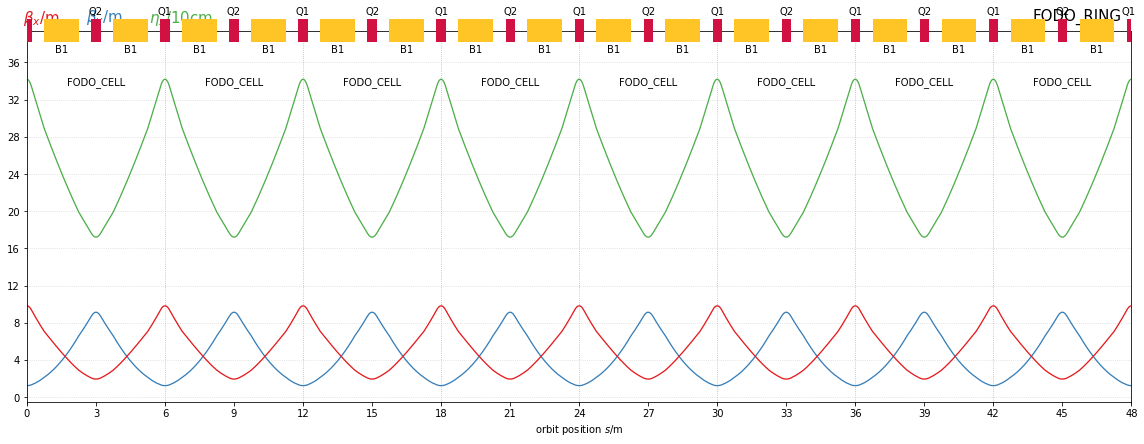

In [5]:
from apace.plot import plot_lattice

fig = plot_lattice(twiss, fodo_ring)
fig.set_size_inches(16, 6)